# Mini Project 3

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**

The code below provides a visual representation of how the Black-Scholes **call option** price changes with respect to time.

**a)** Use the visualization to interpret how the *rate of change* of the Black-Scholes call option price behaves as time progresses.

**b)** Create a separate graphic to visualize how the *rate of change* of the Black-Scholes call option price depends on the spot price $S(0)$.

**c)** Repeat parts **a** and **b** for **put option** prices.

**d)** Use the space below to record your observations and reflections based on the generated plots.

---

### Observations:

- *Call Option – Time Sensitivity:* As time to expiration increases, the price of a call option rises because the holder gains more opportunity for the stock price to exceed the strike. However, the rate of increase slows as time grows large, since the additional value from extra time diminishes. The greatest time sensitivity occurs when expiration is near, where each extra day has a meaningful impact. The curve of call price versus time reflects this, with a steep initial slope that flattens over longer durations.

- *Call Option – Spot Price Sensitivity:*  The price of a call option increases as the spot price rises, but this relationship is not linear. When the spot price is below the strike, the call price grows slowly because the probability of finishing in-the-money is still low. As the spot price approaches and exceeds the strike, the call price becomes highly sensitive, growing rapidly as intrinsic value builds. The plot shows this with a curve that steepens significantly once the spot price surpasses the strike.

- *Put Option – Time Sensitivity:*  Increasing time to expiration boosts the option’s price because it allows more chance for the stock to fall below the strike. This time sensitivity is strongest at shorter to medium durations, where each added day significantly increases value. At longer horizons, the benefit of extra time fades, and price increases taper off. The put price versus time plot shows this with a steep rise that levels as time extends.

- *Put Option – Spot Price Sensitivity:* The put option price rises as the spot price declines, especially once the option moves below the strike price. Initially, the price increase is moderate when near the strike, but as the spot drops further, the price accelerates sharply. This is due to the growing intrinsic value of the deep in-the-money put. The plot confirms this, showing a curve that bends sharply upward as spot price falls further below strike.

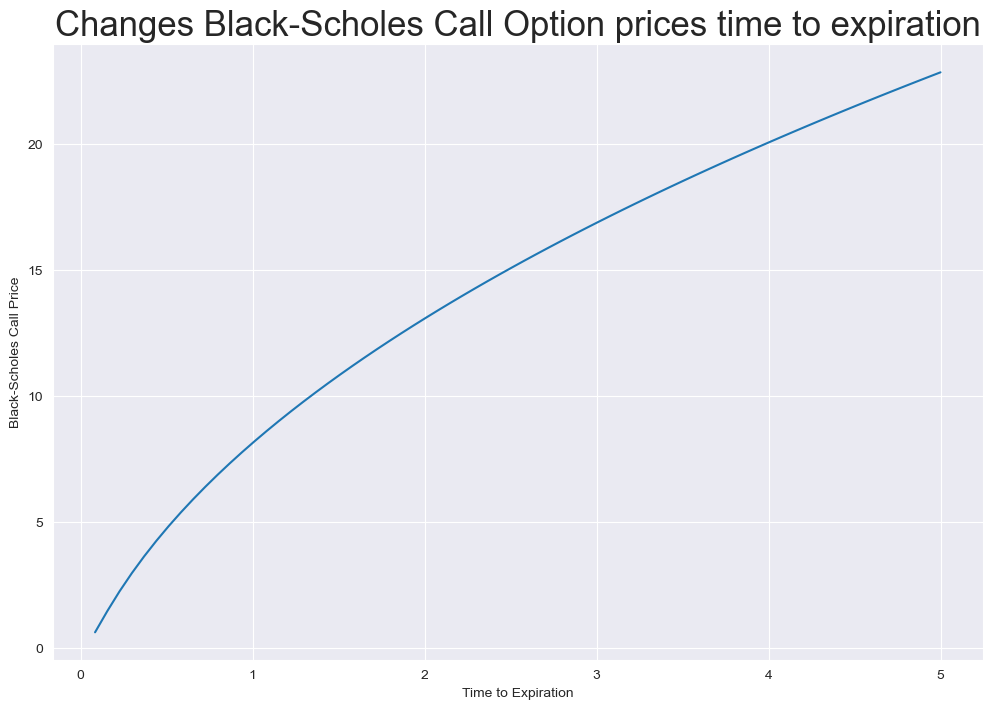

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sns
sns.set_style('darkgrid')

def bs_call(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European call option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Call option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return S0*norm.cdf(d1)-K*np.exp(-r*t)*norm.cdf(d2)


def bs_put(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European put option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Put option price
    """
    
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return -S0*norm.cdf(-d1)+K*np.exp(-r*t)*norm.cdf(-d2)


S0 = 100
K = 110
sigma = .3
times = np.linspace(1/12, 5, 70)
r = 0

call_prices = [bs_call(S0,K,sigma, t = times[i]) for i in range(len(times))]


plt.figure(figsize = (12,8))
plt.title('Changes Black-Scholes Call Option prices time to expiration', size = 25)
plt.plot(times, call_prices)
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Call Price')
plt.show()

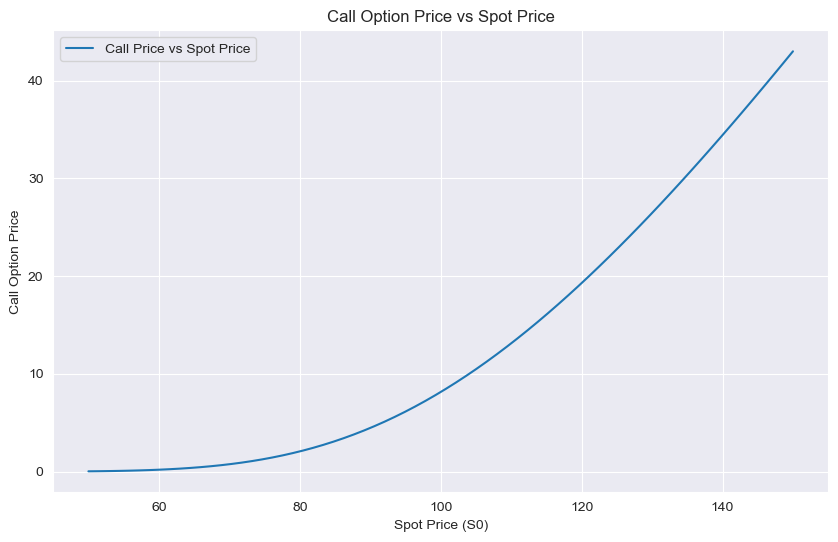

In [7]:
# --- Part b: Call price vs spot price ---
S0_values = np.linspace(50, 150, 70)
t_fixed = 1  # 1 year to expiration
call_prices_S0 = [bs_call(S, K, sigma, t_fixed) for S in S0_values]

plt.figure(figsize=(10,6))
plt.plot(S0_values, call_prices_S0, label="Call Price vs Spot Price")
plt.title("Call Option Price vs Spot Price")
plt.xlabel("Spot Price (S0)")
plt.ylabel("Call Option Price")
plt.legend()
plt.show()

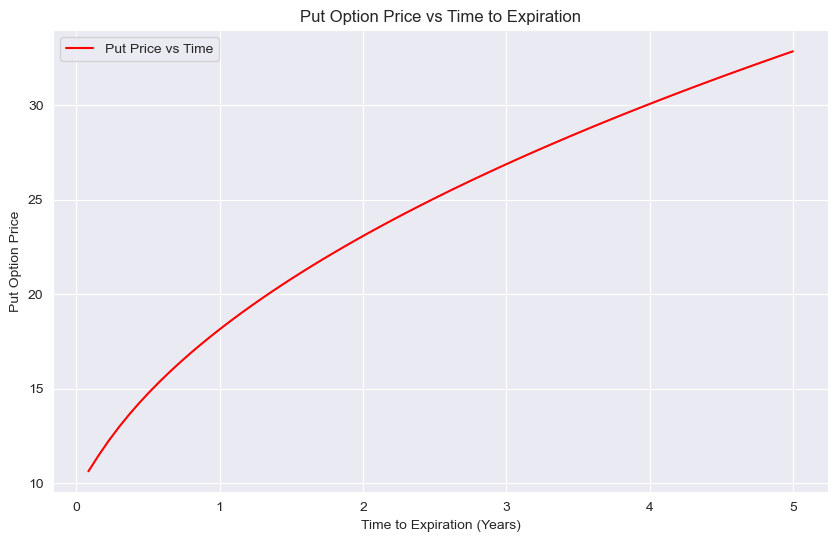

In [8]:
# --- Part c: Put price vs time ---
put_prices_time = [bs_put(S0, K, sigma, t) for t in times]

plt.figure(figsize=(10,6))
plt.plot(times, put_prices_time, label="Put Price vs Time", color='red')
plt.title("Put Option Price vs Time to Expiration")
plt.xlabel("Time to Expiration (Years)")
plt.ylabel("Put Option Price")
plt.legend()
plt.show()

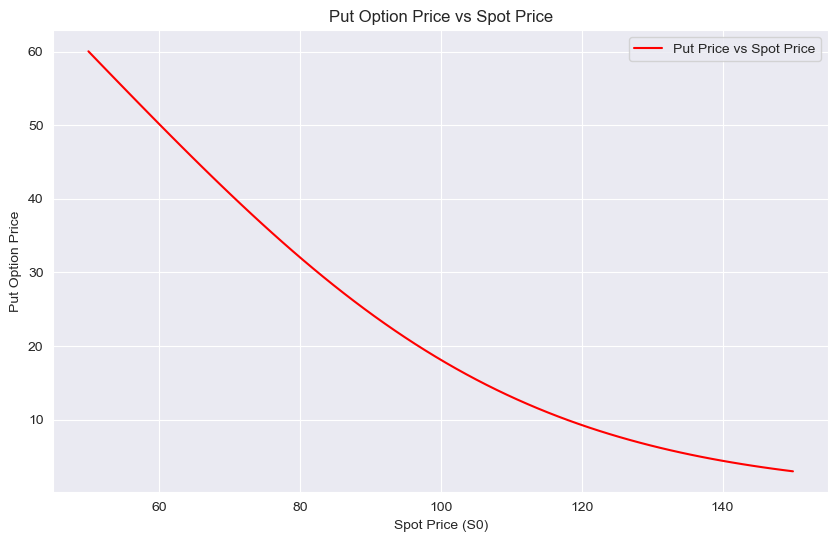

In [9]:
# --- Part c: Put price vs spot price ---
put_prices_S0 = [bs_put(S, K, sigma, t_fixed) for S in S0_values]

plt.figure(figsize=(10,6))
plt.plot(S0_values, put_prices_S0, label="Put Price vs Spot Price", color='red')
plt.title("Put Option Price vs Spot Price")
plt.xlabel("Spot Price (S0)")
plt.ylabel("Put Option Price")
plt.legend()
plt.show()